# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing two different dictionary initalization strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'DICT_INIT'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=2**10, record_each=16, 
            homeo_method='HAP', eta_homeo=0.05, alpha_homeo=1.,
            learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : data_cache/data_data
Data is of shape : (81920, 256) - done in 0.11s.


## White Noise Initialization + Learning

No cache found data_cache/DICT_INIT_WHITE_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   1 /   1024 (elapsed time:   0s,   0mn   0s)
Iteration  17 /   1024 (elapsed time:   3s,   0mn   3s)
Iteration  33 /   1024 (elapsed time:   6s,   0mn   6s)
Iteration  49 /   1024 (elapsed time:   9s,   0mn   9s)
Iteration  65 /   1024 (elapsed time:  12s,   0mn  12s)
Iteration  81 /   1024 (elapsed time:  15s,   0mn  15s)
Iteration  97 /   1024 (elapsed time:  18s,   0mn  18s)
Iteration  113 /   1024 (elapsed time:  21s,   0mn  21s)
Iteration  129 /   1024 (elapsed time:  24s,   0mn  24s)
Iteration  145 /   1024 (elapsed time:  27s,   0mn  27s)
Iteration  161 /   1024 (elapsed time:  30s,   0mn  30s)
Iteration  177 /   1024 (elapsed time:  33s,   0mn  33s)
Iteration  193 /   1024 (elapsed time:  36s,   0mn  36s)
Iteration  209 /   1024 (elapsed time:  39s,   0mn  39s)
Iteration  225 /   1024 (elapsed time:  41s,   0mn  41s)
Iteration  24

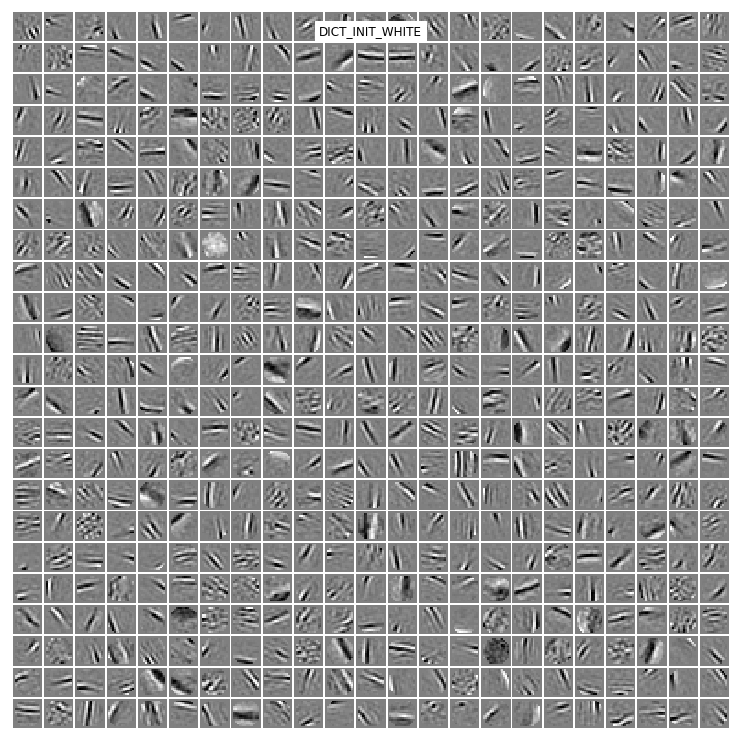

In [4]:
matname = tag + '_WHITE'
shl = SHL(one_over_F=False, **opts)
dico_w = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## 1/f Noise Initialization + Learning

No cache found data_cache/DICT_INIT_OVF_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   1 /   1024 (elapsed time:   0s,   0mn   0s)
Iteration  17 /   1024 (elapsed time:   3s,   0mn   3s)
Iteration  33 /   1024 (elapsed time:   5s,   0mn   5s)
Iteration  49 /   1024 (elapsed time:   8s,   0mn   8s)
Iteration  65 /   1024 (elapsed time:  11s,   0mn  11s)
Iteration  81 /   1024 (elapsed time:  14s,   0mn  14s)
Iteration  97 /   1024 (elapsed time:  16s,   0mn  16s)
Iteration  113 /   1024 (elapsed time:  19s,   0mn  19s)
Iteration  129 /   1024 (elapsed time:  22s,   0mn  22s)
Iteration  145 /   1024 (elapsed time:  24s,   0mn  24s)
Iteration  161 /   1024 (elapsed time:  27s,   0mn  27s)
Iteration  177 /   1024 (elapsed time:  30s,   0mn  30s)
Iteration  193 /   1024 (elapsed time:  32s,   0mn  32s)
Iteration  209 /   1024 (elapsed time:  35s,   0mn  35s)
Iteration  225 /   1024 (elapsed time:  38s,   0mn  38s)
Iteration  241 

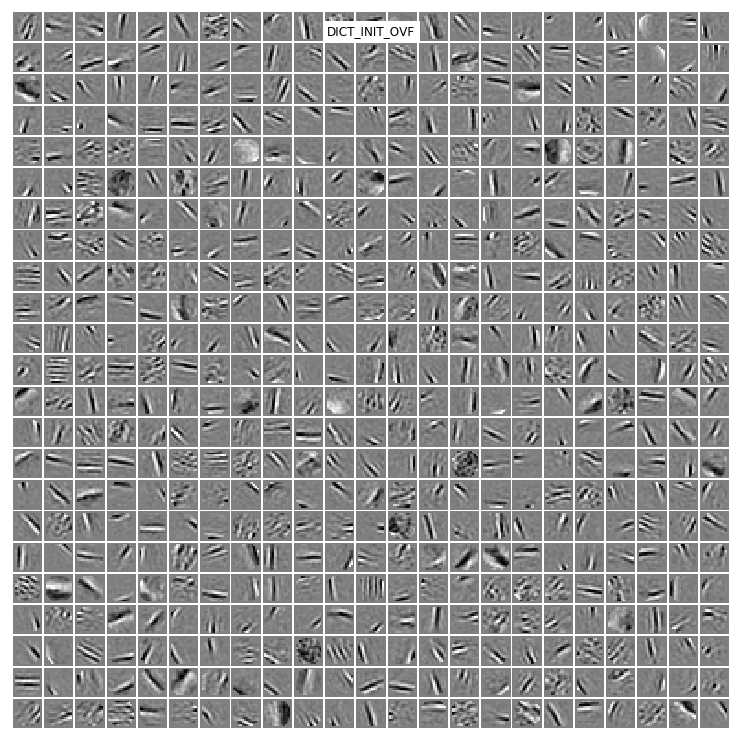

In [5]:
matname = tag + '_OVF'
shl = SHL(one_over_F=True, **opts)
dico_1oF = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

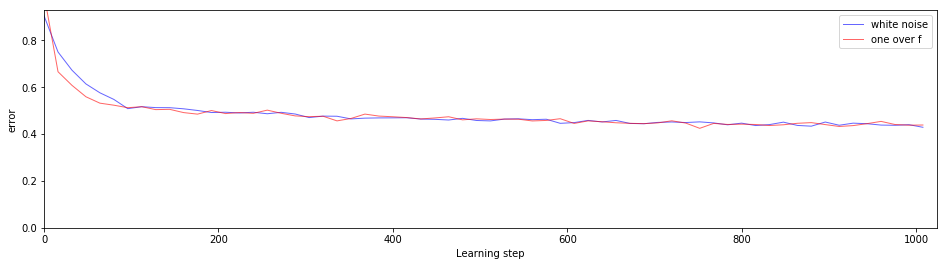

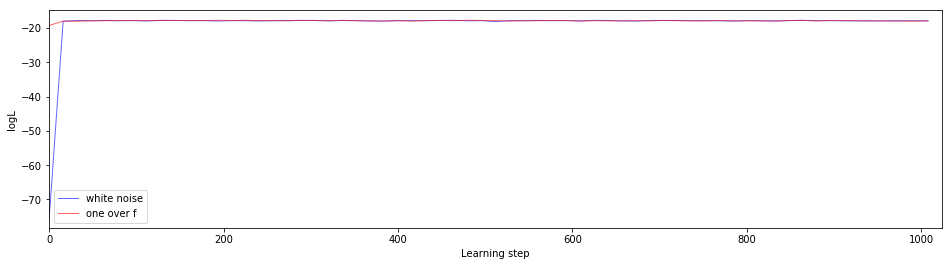

In [6]:
for variable in ['error', 'logL']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_w, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='white noise')
    fig_error, ax_error = shl.time_plot(dico_1oF, variable=variable, fig=fig_error, ax=ax_error, color='red', label='one over f')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();

## Version used

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.0
shl_scripts 20171221
pandas 0.22.0
Wed Feb 21 10:24:25 2018 CET